In [2]:
import os
import PIL
import numpy as np
from glob import glob
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers, regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential, load_model, model_from_json, Model

In [3]:
from keras.models import Model
from keras.layers import Flatten, Dense, BatchNormalization, Dropout
from keras.applications import VGG16
from tensorflow.keras.regularizers import l2
#from keras.preprocessing import image
num_classes = 4

IMAGE_SIZE = [256, 256]  # we will keep the image size as (64,64). You can increase the size for better results. 

# loading the weights of VGG16 without the top layer. These weights are trained on Imagenet dataset.
vgg = VGG16(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False)  # input_shape = (64,64,3) as required by VGG

# this will exclude the initial layers from training phase as there are already been trained.
for layer in vgg.layers:
    layer.trainable = False

x = Flatten()(vgg.output)
x = BatchNormalization()(x)
x = Dense(128, activation='relu')(x)
x = Dense(num_classes, activation = 'softmax')(x)  # adding the output layer with softmax function as this is a multi label classification problem.

model = Model(inputs = vgg.input, outputs = x)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

2023-11-29 11:41:01.827507: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-11-29 11:41:01.827534: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-11-29 11:41:01.827542: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-11-29 11:41:01.827833: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-29 11:41:01.828167: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
train_dir ='/Users/aayushrangra/Desktop/GrapeVine_Disease_Detection/custom_dataset/train'
valid_dir ='/Users/aayushrangra/Desktop/GrapeVine_Disease_Detection/custom_dataset/valid'
test_dir = '/Users/aayushrangra/Desktop/GrapeVine_Disease_Detection/custom_dataset/test'


In [5]:
IMAGE_SIZE = [256, 256]

train_gen = ImageDataGenerator(
    rescale=1./255
    )
val_gen = ImageDataGenerator(
    rescale=1./255
    )  
test_gen = ImageDataGenerator(
    rescale=1./255
    )


train_set = train_gen.flow_from_directory(
    train_dir,
    class_mode = 'categorical',
    target_size = IMAGE_SIZE,
    batch_size = 16
    )
val_set = val_gen.flow_from_directory(
    valid_dir,
    class_mode = 'categorical',
    target_size = IMAGE_SIZE,
    batch_size = 16
    )
test_set = test_gen.flow_from_directory(
    test_dir,
    class_mode = 'categorical',
    target_size = IMAGE_SIZE,
    batch_size = 16
)

Found 25895 images belonging to 4 classes.
Found 3427 images belonging to 4 classes.
Found 3245 images belonging to 4 classes.


In [6]:
model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
    optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=1e-5),
    metrics=['accuracy']
    )

In [7]:
VGG_model = model.fit(
     train_set,
     validation_data=val_set, 
     epochs=10,
     steps_per_epoch = len(train_set),
     validation_steps = len(val_set),)

Epoch 1/10


2023-11-29 11:41:13.061086: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1619/1619 [==============================] - 1035s 639ms/step - loss: 0.2366 - accuracy: 0.9132 - val_loss: 0.0711 - val_accuracy: 0.9746
Epoch 2/10
1619/1619 [==============================] - 1081s 668ms/step - loss: 0.0815 - accuracy: 0.9701 - val_loss: 0.0424 - val_accuracy: 0.9842
Epoch 3/10
1619/1619 [==============================] - 1177s 727ms/step - loss: 0.0568 - accuracy: 0.9802 - val_loss: 0.0353 - val_accuracy: 0.9877
Epoch 4/10
1619/1619 [==============================] - 1130s 698ms/step - loss: 0.0422 - accuracy: 0.9862 - val_loss: 0.0272 - val_accuracy: 0.9912
Epoch 5/10
1619/1619 [==============================] - 1086s 671ms/step - loss: 0.0338 - accuracy: 0.9884 - val_loss: 0.0254 - val_accuracy: 0.9912
Epoch 6/10
1619/1619 [==============================] - 1079s 666ms/step - loss: 0.0278 - accuracy: 0.9906 - val_loss: 0.0252 - val_accuracy: 0.9918
Epoch 7/10
1619/1619 [==============================] - 1064s 657ms/step - loss: 0.0227 - accuracy: 0.9925 - val_loss

In [8]:
VGG_model.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [9]:
acc = VGG_model.history['accuracy']
val_acc = VGG_model.history['val_accuracy']

loss = VGG_model.history['loss']
val_loss = VGG_model.history['val_loss']

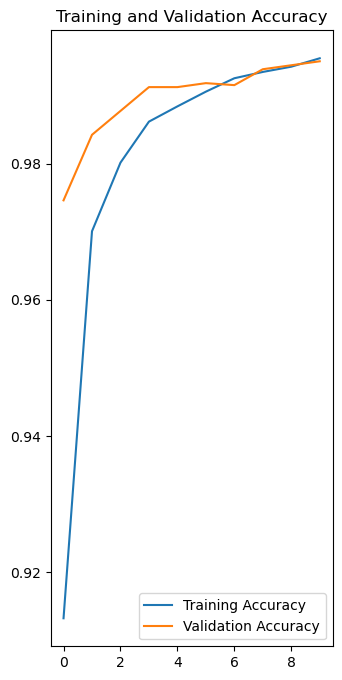

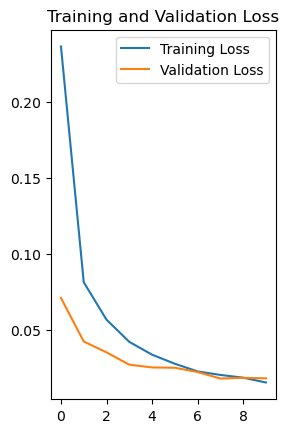

In [11]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(10), acc, label='Training Accuracy')
plt.plot(range(10), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()


plt.subplot(1, 2, 2)
plt.plot(range(10), loss, label='Training Loss')
plt.plot(range(10), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [12]:
predictions = model.predict(test_set)

203/203 [==============================] - 64s 317ms/step


In [13]:
y_pred = np.argmax(predictions, axis=-1)

In [14]:
test_set.class_indices

{'Grape Black rot': 0,
 'Grape Esca Black Measles': 1,
 'Grape Leaf blight Isariopsis Leaf Spot': 2,
 'Grape healthy': 3}

In [15]:
scores = model.evaluate(test_set, batch_size=16, verbose=2)

203/203 - 73s - loss: 0.0195 - accuracy: 0.9929 - 73s/epoch - 359ms/step
